# TOTVS DATA CHALLENGE

#### 1. Parse and extract the data.
#### 2. Identify a pattern on any set of fields that can help predict how much a customer will spend.
#### 3. Calculate a sales forecast for the next week.

Import packages:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

### Import the sample as json:

In [2]:
totvs_sample = pd.read_json('sample.txt')

In [3]:
totvs_sample.head()

,complemento,dets,emit,ide,infAdic,total,versaoDocumento
0,{'valorTotal': 24.9},"[{'nItem': '1', 'prod': {'indTot': '1', 'qCom'...","{'cnpj': '01.234.567/0001-89', 'enderEmit': {'...",{'dhEmi': {'$date': '2016-01-05T12:01:54.000Z'...,{'infCpl': 'Mesa 2'},"{'icmsTot': {'vDesc': 0.0, 'vFrete': 0.0, 'vOu...",1
1,{'valorTotal': 92.53},"[{'nItem': '1', 'prod': {'indTot': '1', 'qCom'...","{'cnpj': '01.234.567/0001-89', 'enderEmit': {'...",{'dhEmi': {'$date': '2016-01-05T12:03:52.000Z'...,{'infCpl': 'Mesa 1'},"{'icmsTot': {'vDesc': 0.0, 'vFrete': 0.0, 'vOu...",1
2,{'valorTotal': 57.86},"[{'nItem': '1', 'prod': {'indTot': '1', 'qCom'...","{'cnpj': '01.234.567/0001-89', 'enderEmit': {'...",{'dhEmi': {'$date': '2016-01-05T12:16:40.000Z'...,{'infCpl': 'Mesa 5'},"{'icmsTot': {'vDesc': 0.0, 'vFrete': 0.0, 'vOu...",1
3,{'valorTotal': 34.97},"[{'nItem': '1', 'prod': {'indTot': '1', 'qCom'...","{'cnpj': '01.234.567/0001-89', 'enderEmit': {'...",{'dhEmi': {'$date': '2016-01-05T12:17:50.000Z'...,{'infCpl': 'Mesa 3'},"{'icmsTot': {'vDesc': 0.0, 'vFrete': 0.0, 'vOu...",1
4,{'valorTotal': 46.23},"[{'nItem': '1', 'prod': {'indTot': '1', 'qCom'...","{'cnpj': '01.234.567/0001-89', 'enderEmit': {'...",{'dhEmi': {'$date': '2016-01-05T12:18:35.000Z'...,{'infCpl': 'Mesa 4'},"{'icmsTot': {'vDesc': 0.0, 'vFrete': 0.0, 'vOu...",1


In [4]:
with open('sample.txt') as json_file:
    json_data = json.load(json_file)

In [5]:
json_data[0]

{'complemento': {'valorTotal': 24.9},
 'dets': [{'nItem': '1',
   'prod': {'indTot': '1',
    'qCom': 1.0,
    'uCom': 'UN',
    'vProd': 3.5,
    'vUnCom': 3.5,
    'xProd': 'AGUA'}},
  {'nItem': '2',
   'prod': {'indTot': '1',
    'qCom': 0.312,
    'uCom': 'KG',
    'vProd': 21.4,
    'vUnCom': 68.6,
    'xProd': 'BUFFET'}}],
 'emit': {'cnpj': '01.234.567/0001-89',
  'enderEmit': {'fone': '1-650-933-4902',
   'uf': 'CA',
   'xBairro': '',
   'xLgr': '650 Castro St. unit 210',
   'xMun': 'Mountain View',
   'xPais': 'United States'},
  'xFant': 'TOTVS Labs'},
 'ide': {'dhEmi': {'$date': '2016-01-05T12:01:54.000Z'}, 'natOp': 'VENDA'},
 'infAdic': {'infCpl': 'Mesa 2'},
 'total': {'icmsTot': {'vDesc': 0.0,
   'vFrete': 0.0,
   'vOutro': 0.0,
   'vProd': 24.9,
   'vSeg': 0.0,
   'vTotTrib': 2.53,
   'vbc': 0.0,
   'vbcst': 0.0,
   'vcofins': 0.0,
   'vicms': 0.0,
   'vicmsDeson': 0.0,
   'vii': 0.0,
   'vipi': 0.0,
   'vnf': 24.9,
   'vpis': 0.0,
   'vst': 0.0}},
 'versaoDocumento': 1.0}

In [6]:
sample = pd.DataFrame(json_data)

### Getting what is useful for the job:

In [7]:
u_sample = sample[['complemento', 'dets', 'ide', 'infAdic']]

In [8]:
u_sample.head()

,complemento,dets,ide,infAdic
0,{'valorTotal': 24.9},"[{'nItem': '1', 'prod': {'indTot': '1', 'qCom'...",{'dhEmi': {'$date': '2016-01-05T12:01:54.000Z'...,{'infCpl': 'Mesa 2'}
1,{'valorTotal': 92.53},"[{'nItem': '1', 'prod': {'indTot': '1', 'qCom'...",{'dhEmi': {'$date': '2016-01-05T12:03:52.000Z'...,{'infCpl': 'Mesa 1'}
2,{'valorTotal': 57.86},"[{'nItem': '1', 'prod': {'indTot': '1', 'qCom'...",{'dhEmi': {'$date': '2016-01-05T12:16:40.000Z'...,{'infCpl': 'Mesa 5'}
3,{'valorTotal': 34.97},"[{'nItem': '1', 'prod': {'indTot': '1', 'qCom'...",{'dhEmi': {'$date': '2016-01-05T12:17:50.000Z'...,{'infCpl': 'Mesa 3'}
4,{'valorTotal': 46.23},"[{'nItem': '1', 'prod': {'indTot': '1', 'qCom'...",{'dhEmi': {'$date': '2016-01-05T12:18:35.000Z'...,{'infCpl': 'Mesa 4'}


In [9]:
u_sample_copy = u_sample.copy()
u_sample_copy['valorTotal'] = ''

In [10]:
for i in u_sample_copy.index:
    u_sample_copy['valorTotal'][i] = u_sample_copy['complemento'][i]['valorTotal']
    u_sample_copy['ide'][i] = u_sample_copy['ide'][i]['dhEmi']['$date']
    u_sample_copy['infAdic'][i] = u_sample_copy['infAdic'][i]['infCpl']

In [11]:
u_sample_copy.head() #testing

,complemento,dets,ide,infAdic,valorTotal
0,{'valorTotal': 24.9},"[{'nItem': '1', 'prod': {'indTot': '1', 'qCom'...",2016-01-05T12:01:54.000Z,Mesa 2,24.9
1,{'valorTotal': 92.53},"[{'nItem': '1', 'prod': {'indTot': '1', 'qCom'...",2016-01-05T12:03:52.000Z,Mesa 1,92.53
2,{'valorTotal': 57.86},"[{'nItem': '1', 'prod': {'indTot': '1', 'qCom'...",2016-01-05T12:16:40.000Z,Mesa 5,57.86
3,{'valorTotal': 34.97},"[{'nItem': '1', 'prod': {'indTot': '1', 'qCom'...",2016-01-05T12:17:50.000Z,Mesa 3,34.97
4,{'valorTotal': 46.23},"[{'nItem': '1', 'prod': {'indTot': '1', 'qCom'...",2016-01-05T12:18:35.000Z,Mesa 4,46.23


In [12]:
u_sample_copy.pop('complemento')

0         {'valorTotal': 24.9}
1        {'valorTotal': 92.53}
2        {'valorTotal': 57.86}
3        {'valorTotal': 34.97}
4        {'valorTotal': 46.23}
5        {'valorTotal': 32.76}
6        {'valorTotal': 57.11}
7        {'valorTotal': 36.19}
8        {'valorTotal': 32.37}
9       {'valorTotal': 119.47}
10       {'valorTotal': 37.04}
11       {'valorTotal': 32.41}
12       {'valorTotal': 34.17}
13       {'valorTotal': 36.46}
14       {'valorTotal': 27.13}
15       {'valorTotal': 26.65}
16       {'valorTotal': 30.59}
17       {'valorTotal': 33.99}
18       {'valorTotal': 21.71}
19       {'valorTotal': 32.35}
20       {'valorTotal': 23.77}
21       {'valorTotal': 23.46}
22       {'valorTotal': 62.36}
23       {'valorTotal': 29.97}
24        {'valorTotal': 47.3}
25       {'valorTotal': 39.13}
26       {'valorTotal': 34.27}
27       {'valorTotal': 22.22}
28       {'valorTotal': 39.17}
29       {'valorTotal': 27.16}
                 ...          
1605     {'valorTotal': 66.01}
1606    

### Listing itens bought by date and table:

In [13]:
u_sample_copy.head()

,dets,ide,infAdic,valorTotal
0,"[{'nItem': '1', 'prod': {'indTot': '1', 'qCom'...",2016-01-05T12:01:54.000Z,Mesa 2,24.9
1,"[{'nItem': '1', 'prod': {'indTot': '1', 'qCom'...",2016-01-05T12:03:52.000Z,Mesa 1,92.53
2,"[{'nItem': '1', 'prod': {'indTot': '1', 'qCom'...",2016-01-05T12:16:40.000Z,Mesa 5,57.86
3,"[{'nItem': '1', 'prod': {'indTot': '1', 'qCom'...",2016-01-05T12:17:50.000Z,Mesa 3,34.97
4,"[{'nItem': '1', 'prod': {'indTot': '1', 'qCom'...",2016-01-05T12:18:35.000Z,Mesa 4,46.23


In [14]:
u_sample_copy.dets[0]

[{'nItem': '1',
  'prod': {'indTot': '1',
   'qCom': 1.0,
   'uCom': 'UN',
   'vProd': 3.5,
   'vUnCom': 3.5,
   'xProd': 'AGUA'}},
 {'nItem': '2',
  'prod': {'indTot': '1',
   'qCom': 0.312,
   'uCom': 'KG',
   'vProd': 21.4,
   'vUnCom': 68.6,
   'xProd': 'BUFFET'}}]

In [15]:
produto_df = pd.DataFrame()
produto_df['valorProduto'] = ''
produto_df['nomeProduto'] = ''
produto_df['ide'] = ''

In [16]:
i = 0
for lista in u_sample_copy.dets:
    for produto in lista:
        produto_df.loc[len(produto_df)] = [produto['prod']['vProd'], produto['prod']['xProd'], u_sample_copy.ide[i]]
    i += 1

In [17]:
produto_df.head()

,valorProduto,nomeProduto,ide
0,3.50,AGUA,2016-01-05T12:01:54.000Z
1,21.40,BUFFET,2016-01-05T12:01:54.000Z
2,83.55,BUFFET,2016-01-05T12:03:52.000Z
3,9.00,REFRIGERANTE,2016-01-05T12:03:52.000Z
4,4.50,SUCO,2016-01-05T12:16:40.000Z


In [18]:
u_sample = u_sample_copy.copy()

### Join the two tables into the final version:

In [19]:
totvs_sample = pd.merge(left=u_sample, right=produto_df, on='ide')

In [20]:
totvs_sample = totvs_sample.drop('dets', axis=1)

In [21]:
totvs_sample.head()

,ide,infAdic,valorTotal,valorProduto,nomeProduto
0,2016-01-05T12:01:54.000Z,Mesa 2,24.9,3.50,AGUA
1,2016-01-05T12:01:54.000Z,Mesa 2,24.9,21.40,BUFFET
2,2016-01-05T12:03:52.000Z,Mesa 1,92.53,83.55,BUFFET
3,2016-01-05T12:03:52.000Z,Mesa 1,92.53,9.00,REFRIGERANTE
4,2016-01-05T12:16:40.000Z,Mesa 5,57.86,4.50,SUCO


### Using dates as index and correcting numerical values:

In [22]:
totvs_sample.ide = pd.to_datetime(totvs_sample.ide)

In [23]:
totvs_sample.valorTotal = pd.to_numeric(totvs_sample.valorTotal)
totvs_sample.valorProduto = pd.to_numeric(totvs_sample.valorProduto)

In [24]:
totvs_sample_date = totvs_sample.copy()

In [25]:
totvs_sample_date = totvs_sample_date.set_index('ide')

### The three important DFs:

In [26]:
totvs_sample_date.head()

,infAdic,valorTotal,valorProduto,nomeProduto
ide,,,,
2016-01-05 12:01:54,Mesa 2,24.90,3.50,AGUA
2016-01-05 12:01:54,Mesa 2,24.90,21.40,BUFFET
2016-01-05 12:03:52,Mesa 1,92.53,83.55,BUFFET
2016-01-05 12:03:52,Mesa 1,92.53,9.00,REFRIGERANTE
2016-01-05 12:16:40,Mesa 5,57.86,4.50,SUCO


In [27]:
totvs_sample.head()

,ide,infAdic,valorTotal,valorProduto,nomeProduto
0,2016-01-05 12:01:54,Mesa 2,24.90,3.50,AGUA
1,2016-01-05 12:01:54,Mesa 2,24.90,21.40,BUFFET
2,2016-01-05 12:03:52,Mesa 1,92.53,83.55,BUFFET
3,2016-01-05 12:03:52,Mesa 1,92.53,9.00,REFRIGERANTE
4,2016-01-05 12:16:40,Mesa 5,57.86,4.50,SUCO


In [28]:
u_sample.valorTotal = pd.to_numeric(u_sample.valorTotal)
u_sample.head()

,dets,ide,infAdic,valorTotal
0,"[{'nItem': '1', 'prod': {'indTot': '1', 'qCom'...",2016-01-05T12:01:54.000Z,Mesa 2,24.90
1,"[{'nItem': '1', 'prod': {'indTot': '1', 'qCom'...",2016-01-05T12:03:52.000Z,Mesa 1,92.53
2,"[{'nItem': '1', 'prod': {'indTot': '1', 'qCom'...",2016-01-05T12:16:40.000Z,Mesa 5,57.86
3,"[{'nItem': '1', 'prod': {'indTot': '1', 'qCom'...",2016-01-05T12:17:50.000Z,Mesa 3,34.97
4,"[{'nItem': '1', 'prod': {'indTot': '1', 'qCom'...",2016-01-05T12:18:35.000Z,Mesa 4,46.23


In [29]:
u_sample.valorTotal.describe()

count    1635.000000
mean       55.504171
std        39.217462
min         9.740000
25%        30.985000
50%        43.260000
75%        69.230000
max       608.910000
Name: valorTotal, dtype: float64


#### The outliers should be removed for real data predicts.

#### Values that exceed 1.5 stdev from the mean will be removed.



In [52]:
outliers = 55.504171 + (1.5 * 39.217462)
u_sample_corrected = u_sample[u_sample.valorTotal < outliers]

In [53]:
u_sample_corrected.valorTotal.describe()

count    1528.000000
mean       48.336414
std        23.552045
min         9.740000
25%        30.290000
50%        41.085000
75%        63.480000
max       114.290000
Name: valorTotal, dtype: float64

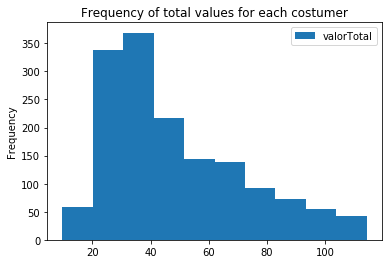

In [80]:
u_sample_corrected.plot(kind='hist')
plt.title('Frequency of total values for each costumer')
plt.show()

## The average costumer

#### As seen above, the average costumer will spend a value around `$`50 and rarely exceeding `$`100.
 
 

In [32]:
buffet = totvs_sample.nomeProduto == 'BUFFET'

In [35]:
buffet_sample = totvs_sample[buffet]

#### The buffet corresponds, in average, to 85% of the total value for each costumer:

In [65]:
buffet_percent = (buffet_sample.valorProduto / buffet_sample.valorTotal) * 100
buffet_percent.describe()

count    1647.000000
mean       85.618170
std        12.461153
min         8.245332
25%        80.426480
50%        87.373737
75%        94.402023
max       100.049285
dtype: float64

### Different times

#### Lunch costumer:

In [105]:
v_total_sample = u_sample.copy()
v_total_sample.ide = pd.to_datetime(v_total_sample.ide)
v_total_sample = v_total_sample.set_index('ide')
v_total_sample = v_total_sample.drop('dets', axis=1)
v_total_sample_out = v_total_sample[v_total_sample.valorTotal < outliers] #remove outliers

lunch = v_total_sample_out.between_time(start_time='12:00', end_time='16:00')
lunch.describe()

,valorTotal
count,1060.000000
mean,44.644151
std,21.325379
min,9.740000
25%,29.187500
50%,37.490000
75%,56.677500
max,114.290000


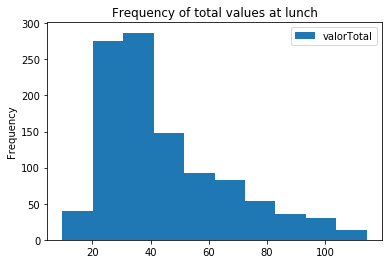

In [106]:
lunch.plot(kind='hist')
plt.title('Frequency of total values at lunch')
plt.show()

In [107]:
dinner = v_total_sample_out.between_time(start_time='16:00', end_time='23:59')
dinner.describe()

,valorTotal
count,460.000000
mean,56.792283
std,26.208146
min,11.930000
25%,35.572500
50%,51.890000
75%,75.895000
max,113.700000


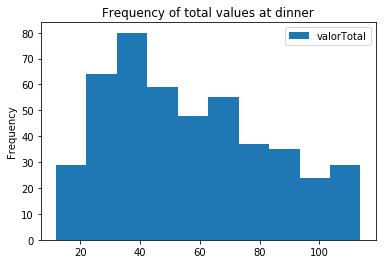

In [108]:
dinner.plot(kind='hist')
plt.title('Frequency of total values at dinner')
plt.show()

### Weekly values

In [112]:
weekly = v_total_sample_out.resample('W').sum()
weekly

,valorTotal
ide,
2016-01-10,19897.96
2016-01-17,25339.28
2016-01-24,28620.80


#### Weekly growth:

In [128]:
f_to_s = ((weekly.iloc[1] / weekly.iloc[0]) - 1) * 100
f_to_s = f_to_s.astype(int)
s_to_t = ((weekly.iloc[2] / weekly.iloc[1]) - 1) * 100
s_to_t = s_to_t.astype(int)

print('First to second week growth: {}%'.format(f_to_s[0]))
print('Second to third week growth: {}%'.format(s_to_t[0]))

First to second week growth: 27%
Second to third week growth: 12%


#### As the income seems to be on a descending growth, it's expected to see a value around 6% for the next week. This will result in a income around:

In [133]:
fourth_week = weekly.iloc[2] * 1.06
print('The expected sales forecast for the upcoming week should be around: ${:.2f}'.format(fourth_week[0]))

The expected sales forecast for the upcoming week should be around: $30338.05


# Conclusions

The average costumer spends around `$`50,00 and the buffet is usually 80% of that value.

At lunch, the costumers spend less and tend to stay pretty close to the value above. On the other hand, at dinner, despite the close average, there are more clients that spend between `$`50,00 and `$`100,00, but rarely above.

The expected weekly value seems to be on a growth, but with a trend to stay around `$`30,000.